# IMPORTING LIBRARIES 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTING DATASET

In [ ]:
dataset = pd.read_csv("/content/EastWestAirlines.csv")

In [ ]:
dataset

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# INDEPENDENT VARIABLE

In [ ]:
X = dataset.iloc[:, [1, 2,3,4,5,6,7,8,9,10,11]].values

In [ ]:
X

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

# ML ALGORITHM


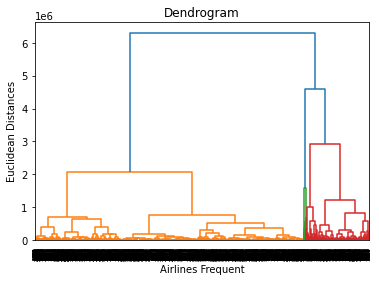

In [ ]:
# FITTING THE MODEL

# FIND OPTIMAL NUMBER OF CLUSTERS
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Airlines Frequent')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
# FITTING THE HIERARCHICAL CLUSTERING TO THE DATASET

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([2, 2, 2, ..., 4, 4, 2])

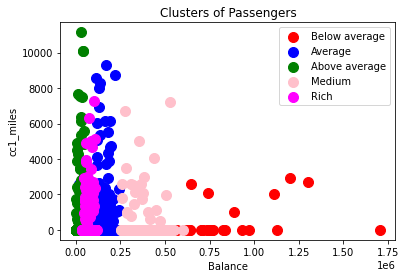

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1], s = 100, c = 'red', label = 'Below average')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Average')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Above average')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3,1], s = 100, c = 'pink', label = 'Medium')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4,1], s = 100, c = 'magenta', label = 'Rich')
plt.title("Clusters of Passengers")
plt.xlabel("Balance")
plt.ylabel("cc1_miles")
plt.legend()
plt.show()